In [1]:
import anndata
import spaco

import scanpy as sc

import matplotlib
import seaborn as sns

import numpy as np
import pandas as pd
import random
import scipy
from skimage import color
from spaco.utils import hex_to_rgb, lab_to_hex

In [2]:
from scipy import stats
from matplotlib import pyplot as plt

# Color alignment between seurat clustering and spatial leiden clustering

In [4]:
adata = anndata.read("./data/10DPI_1_left.h5ad")
radata = anndata.read("./data/15DPI_1_left.h5ad")
adata, radata

(AnnData object with n_obs × n_vars = 4811 × 27600
     obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
     var: 'Gene'
     uns: 'Injury_10DPI_rep1_SS200000147BL_B5', '__type', 'angle_dict'
     obsm: 'X_pca', 'X_spatial', 'spatial'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances',
 AnnData object with n_obs × n_vars = 4514 × 23331
     obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'Celltype', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
     var: 'Gene'
     uns: 'Injury_15DPI_rep2_FP200000266TR_E2', '__type', 'angle_dict'
     obsm: 'X_pca', 'X_spatial', 'spatial'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances')

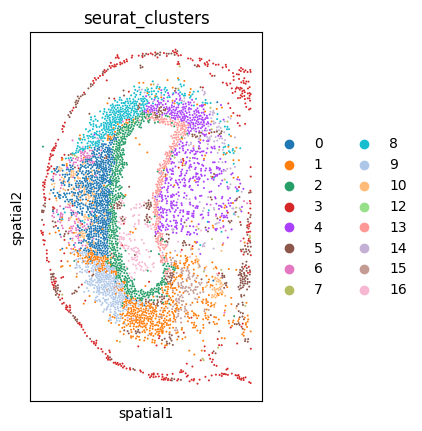

In [5]:
sc.pl.spatial(adata, spot_size=30, color='seurat_clusters')

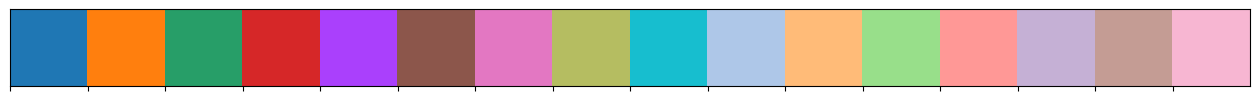

In [6]:
palette_default = adata.uns['seurat_clusters_colors'].copy()
sns.palplot(palette_default)

In [7]:
cluster_keys = ['seurat_clusters','spatial_leiden_e30_s8']
color_mapping_adata = spaco.colorize_mutiple_runs(adata,cluster_keys,
                                              radius=90,
                                              n_neighbors=16,
                                              palette=palette_default,
                                              neighbor_kwargs={'n_cells':3},)
cluster_keys = [cluster_key + "_spaco2" for cluster_key in cluster_keys]

|-----> Mapping clusters between runs...
|-----------------> <insert> 'seurat_clusters_spaco2' to obs in AnnData Object.
|-----------> Mapping run 1 to run 0...
|-----------------> <insert> 'spatial_leiden_e30_s8_spaco2' to obs in AnnData Object.
|-----------> Mapped cluster name added to `adata.obs['***_spaco2']`. Result color mapping will base on new cluster name.
|-----> Calculating cluster distance graph for run 0... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating cluster distance graph for run 1... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Merging cluster distance graph... 
|-----> Calculating color distance graph...


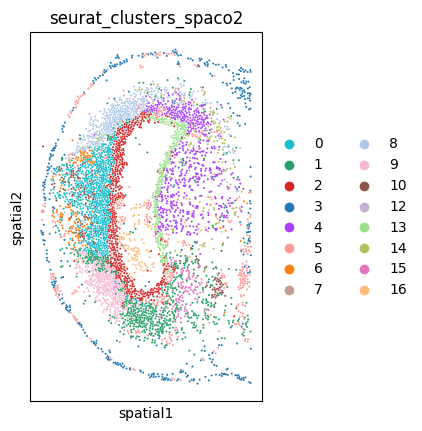

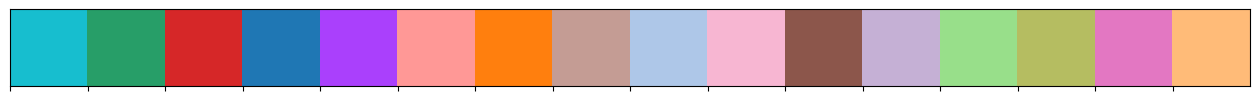

In [8]:
color_mapping = {k: color_mapping_adata[k] for k in adata.obs[cluster_keys[0]].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata, color=cluster_keys[0] , spot_size=30, palette=palette_spaco)
sns.palplot(palette_spaco)

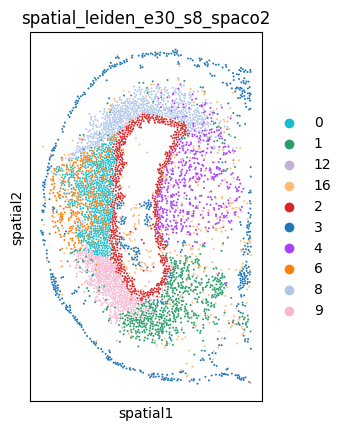

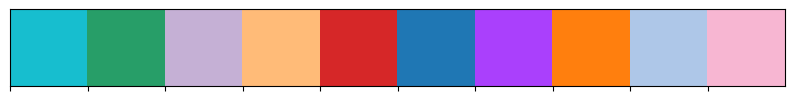

In [9]:
color_mapping = {k: color_mapping_adata[k] for k in adata.obs[cluster_keys[1]].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata, color=cluster_keys[1] , spot_size=30, palette=palette_spaco)
sns.palplot(palette_spaco)

In [10]:
import session_info


session_info.show(excludes=['base'])